# Purpose:
# EDA(exploratory data analysis) and what factors that increase heart attacks!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Seems like the data is already cleaned up. No nulls or missing values.


    Age : Age of the patient

    Sex : Sex of the patient

    exng: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack


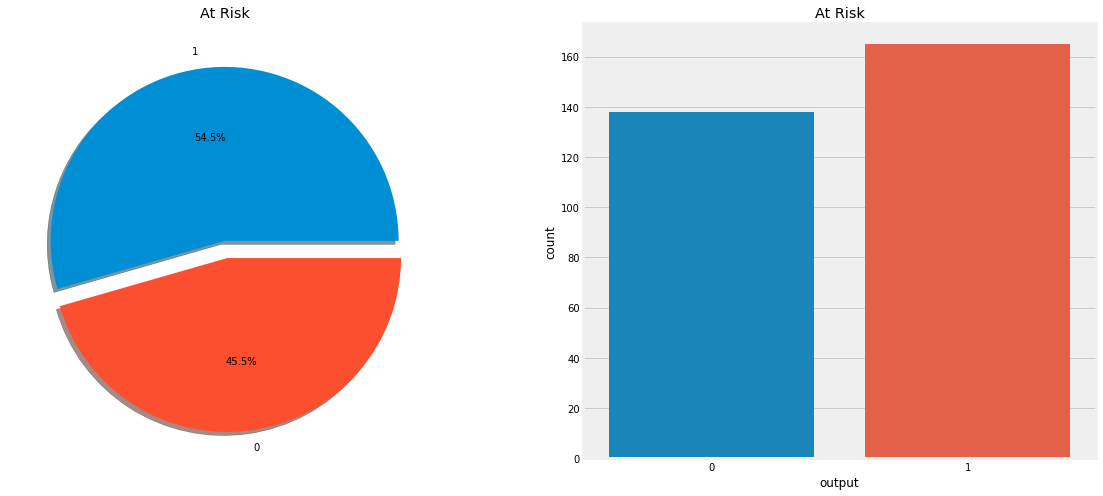

In [6]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['output'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('At Risk')
ax[0].set_ylabel('')
sns.countplot('output',data=data,ax=ax[1])
ax[1].set_title('At Risk')
plt.show()


So it seems like the sample of people have a 9% greater chance of being at risk of a heart attack due to underlying factors.

Let's explore the factors and see what is happening that causes this.

Categorical Features: Sex, exng(exercised induced angina), fbs(fasting blood sugar)

Ordinal Features: ca(number of major vessels),cp(chest pain), rest_ecg

Continous Features: Age, trtbps(resting blood pressure), chol (cholesterol, thalach(max heart rate)

#  Categorical Feature: Sex

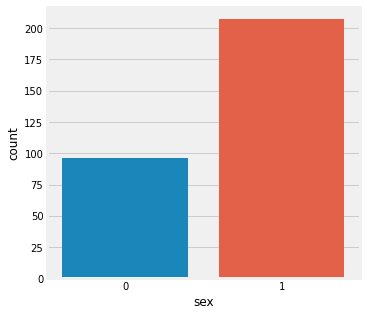

In [7]:
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.countplot('sex',data=data,ax=ax)
plt.show()

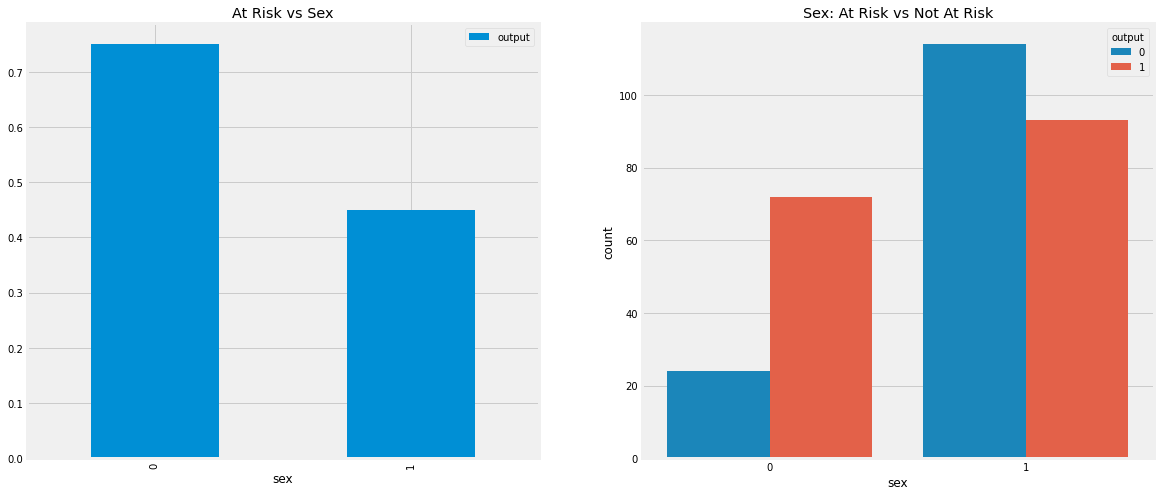

In [8]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['sex','output']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('At Risk vs Sex')
sns.countplot('sex',hue = 'output',data = data, ax=ax[1])
ax[1].set_title('Sex: At Risk vs Not At Risk')
plt.show()

So it seems like whoever is the gender represented by 0 has a lower sample size yet around a 75% chance to be at risk of a heart attack. Gender 0 people are nearly 30% more likely to be at risk than gender 1.

# Categorical Feature: exng(exercised induced angina)

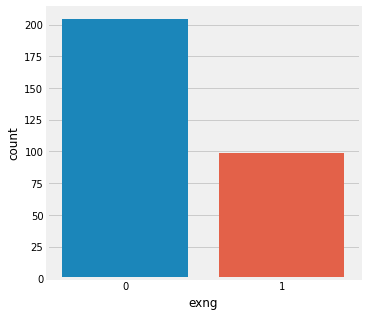

In [9]:
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.countplot('exng',data=data,ax=ax)
plt.show()

<AxesSubplot:xlabel='exng', ylabel='count'>

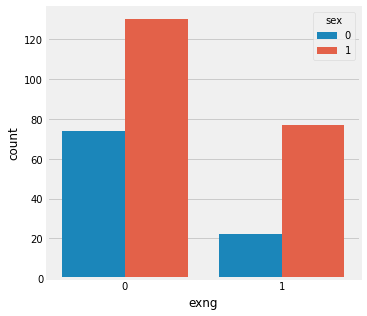

In [10]:
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.countplot('exng',hue='sex',data = data,ax=ax)

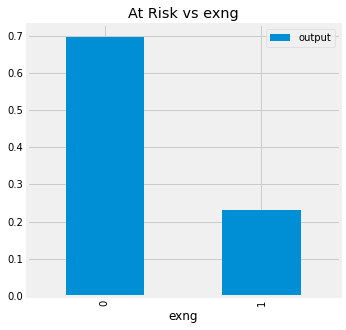

In [11]:
f,ax = plt.subplots(1,1,figsize=(5,5))
data[['exng','output']].groupby(['exng']).mean().plot.bar(ax=ax)
ax.set_title('At Risk vs exng')
plt.show()

There looks to be a 70% chance of being at risk of a heart attack with people who don't have exercise induced angina compared to about 23% to people who do suffer from it. So it seems like it isn't a significant risk.

# Categorical Feature: fbs(fasting blood sugar)

High fasting blood sugar usually indicates diabetes. Anything that is a 1 is a person that has blood sugar greater than 120 mg/dl which indicates diabetes or prediabetes.

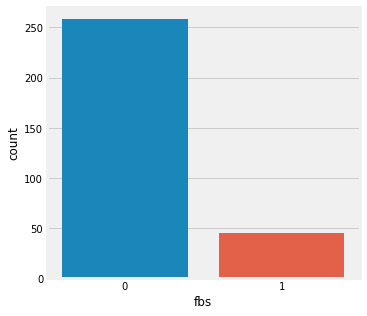

In [12]:
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.countplot('fbs',data=data,ax=ax)
plt.show()

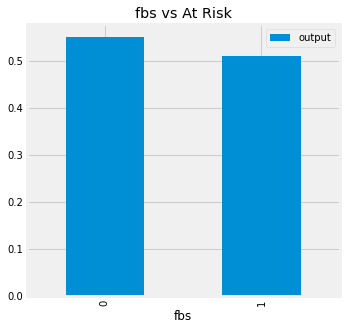

In [13]:
f, ax = plt.subplots(1,1, figsize=(5,5))
data[['fbs','output']].groupby(['fbs']).mean().plot.bar(ax=ax)
ax.set_title('fbs vs At Risk')
plt.show()

Due to the sample size of people with high fasting blood sugar being significatly smaller than people that don't and yet both groups have a greater than 50% chance of a heart attack, having high blood sugar should be a considerable factor.

Over time, high blood sugar damages blood vessels and nerves from the heart causing heart disease.

# Ordinal Feature: ca (number of major vessels)

In [14]:
pd.crosstab(data.caa,data.output,margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
caa,,,
0,45,130,175
1,44,21,65
2,31,7,38
3,17,3,20
4,1,4,5
All,138,165,303


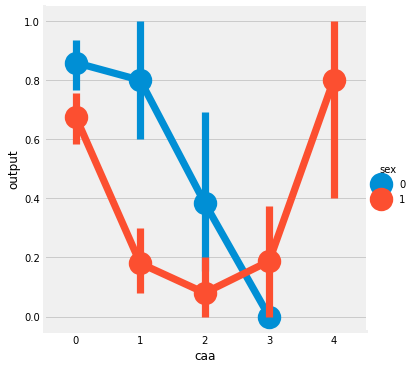

In [15]:
sns.factorplot('caa','output',hue='sex',data=data)
plt.show()

# Ordinal Feature: cp (chest pain)

In [16]:
pd.crosstab(data.cp,data.output,margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


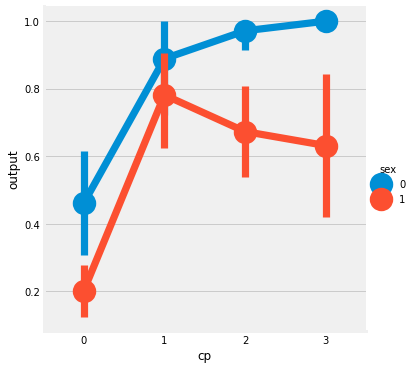

In [17]:
sns.factorplot('cp','output',hue='sex',data=data)
plt.show()

The more serious the angina/chest pain, the greater chance you have in having a heart attack. Gender 0 also has the greater chance of a heart problem with occuring chest pains.

Text(0.5, 1.0, 'Chest Pain vs At Risk')

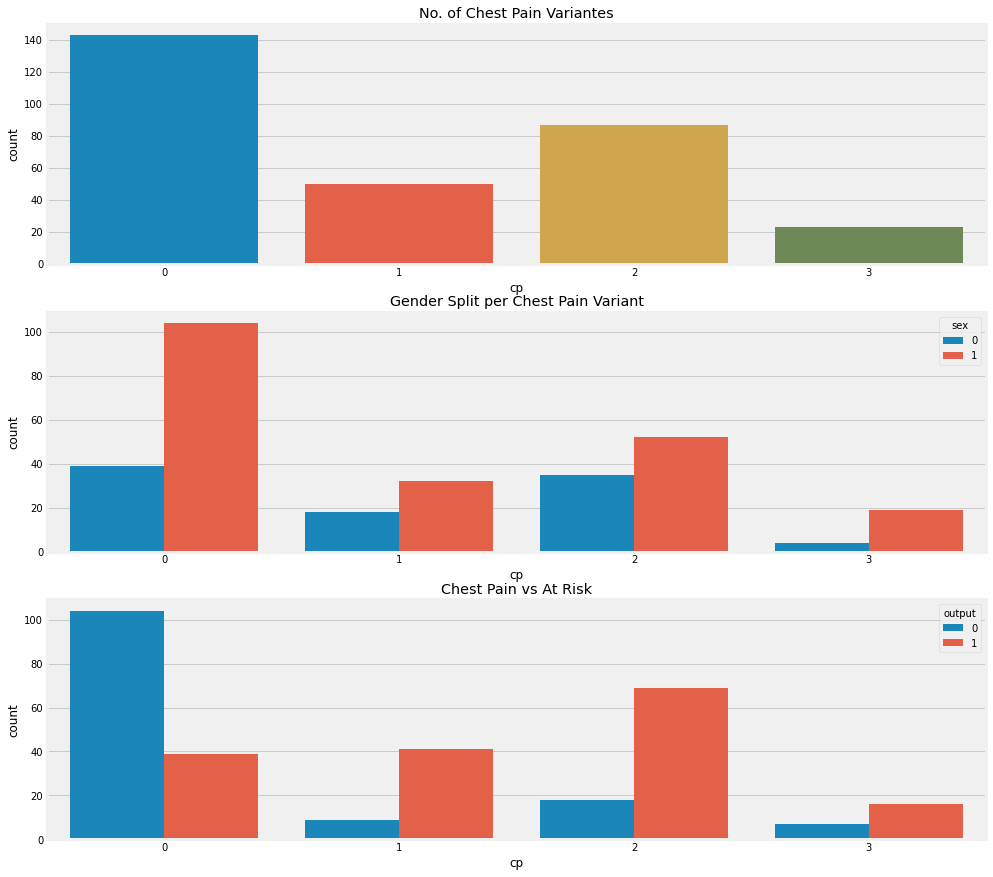

In [18]:
f,ax = plt.subplots(3,figsize=(15,15))
sns.countplot('cp',data=data,ax=ax[0])
ax[0].set_title('No. of Chest Pain Variantes')
sns.countplot('cp',hue='sex',data=data,ax=ax[1])
ax[1].set_title('Gender Split per Chest Pain Variant')
sns.countplot('cp',hue='output',data=data,ax=ax[2])
ax[2].set_title('Chest Pain vs At Risk')

Even with 1 chest pain event, the risk of heart attack increases significantly.

# Ordinal Feature: restecg (resting electrocardiographic results)

In [19]:
pd.crosstab(data.restecg,data.output,margins=True).style.background_gradient(cmap='summer_r')

output,0,1,All
restecg,,,
0,79,68,147
1,56,96,152
2,3,1,4
All,138,165,303


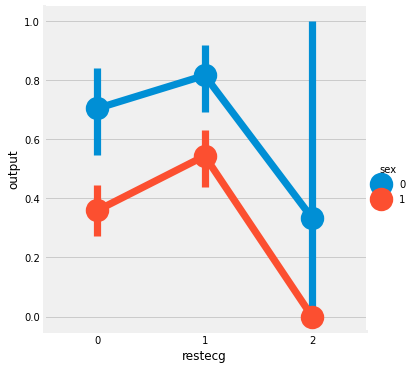

In [20]:
sns.factorplot('restecg','output',hue='sex',data=data)
plt.show()

Text(0.5, 1.0, 'Ecg Result Type vs At Risk')

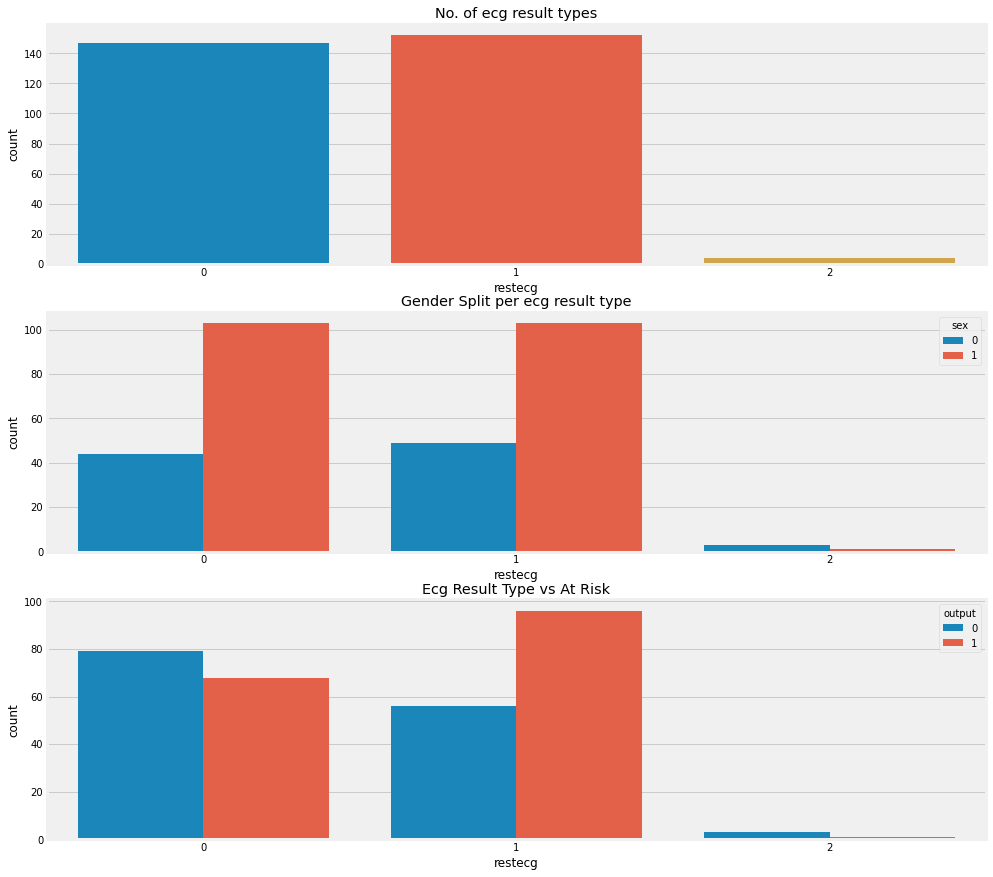

In [21]:
f,ax = plt.subplots(3,figsize=(15,15))
sns.countplot('restecg',data=data,ax=ax[0])
ax[0].set_title('No. of ecg result types')
sns.countplot('restecg',hue='sex',data=data,ax=ax[1])
ax[1].set_title('Gender Split per ecg result type')
sns.countplot('restecg',hue='output',data=data,ax=ax[2])
ax[2].set_title('Ecg Result Type vs At Risk')

Having a ST-T wave abnormality seems like a significant factor in being more at risk.

# Continous Feature: Age

In [22]:
print('Oldest Patient is:',data['age'].max(),'Years')
print('Youngest Patient is:',data['age'].min(),'Years')
print('Average Patient Age is',data['age'].mean(),'Years')

Oldest Patient is: 77 Years
Youngest Patient is: 29 Years
Average Patient Age is 54.366336633663366 Years


Text(0.5, 1.0, 'Sex and Age vs At Risk')

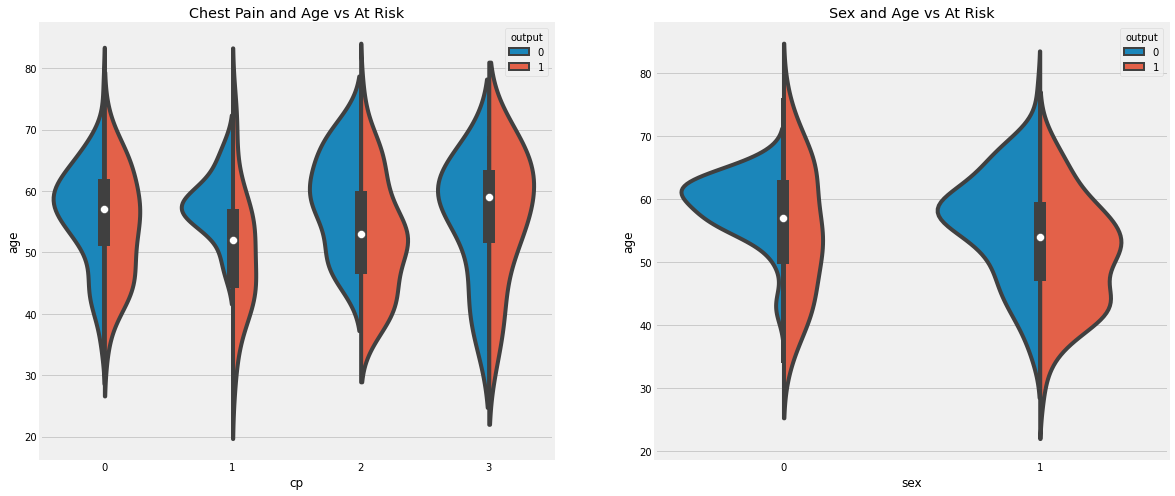

In [23]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot('cp','age',hue='output',data=data,split=True,ax=ax[0])
ax[0].set_title('Chest Pain and Age vs At Risk')
sns.violinplot('sex','age',hue='output',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs At Risk')

Observations:

-The younger you are, the less at risk of a heart attack you are

-The more serious chest pain you have, the greater chance you are at risk when you get older/ 50-70 age range.

-Gender 0 are significantly less at risk as Gender 1 as they get older

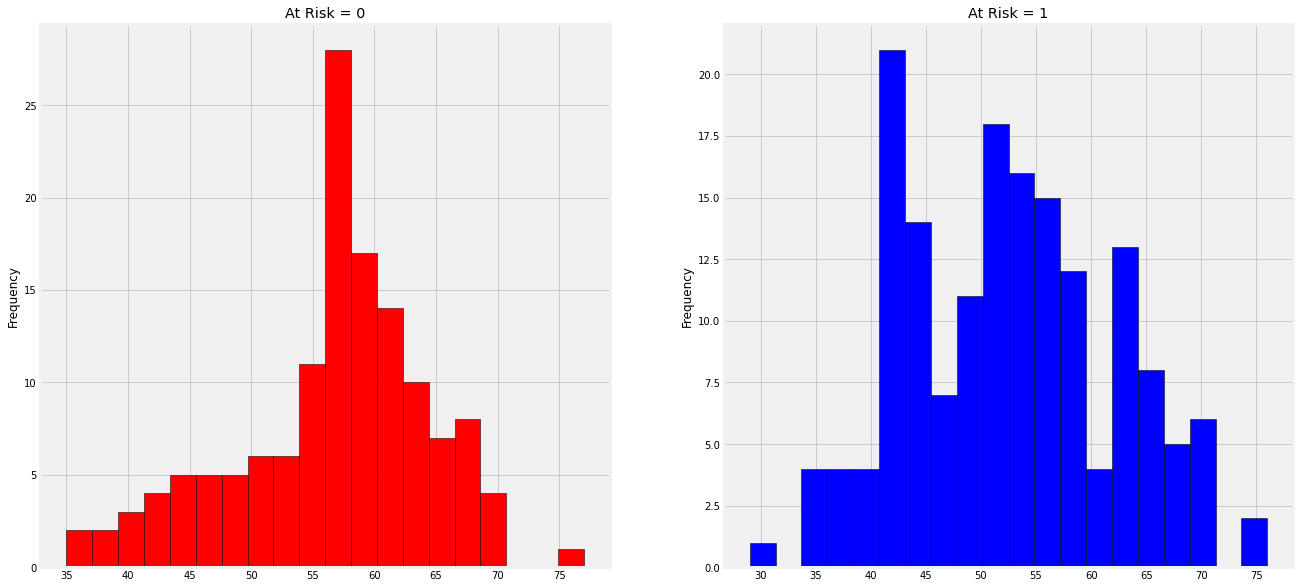

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['output'] == 0].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('At Risk = 0')
x1 = list(range(35,80,5))
ax[0].set_xticks(x1)
data[data['output'] == 1].age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('At Risk = 1')
x2 = list(range(30,80,5))
ax[1].set_xticks(x2)
plt.show()

Observations:

-Most in the not at risk graph are from the 55-65 age range (may just mean the sample is older people).

-Being at risk increases exponentially when you hit your 40's.

-Being young (less than 40) have the least risk of a heart attack.

# Continous Feature: trtbps (resting blood pressure)

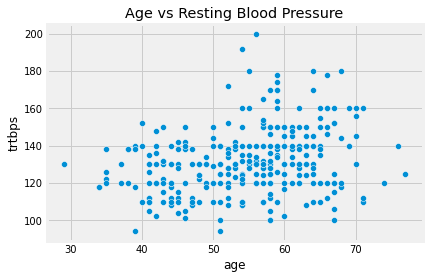

In [25]:
sns.scatterplot('age','trtbps',data=data).set_title('Age vs Resting Blood Pressure')
plt.show()

Text(0.5, 1.0, 'At Risk, Age vs Resting Blood Pressure')

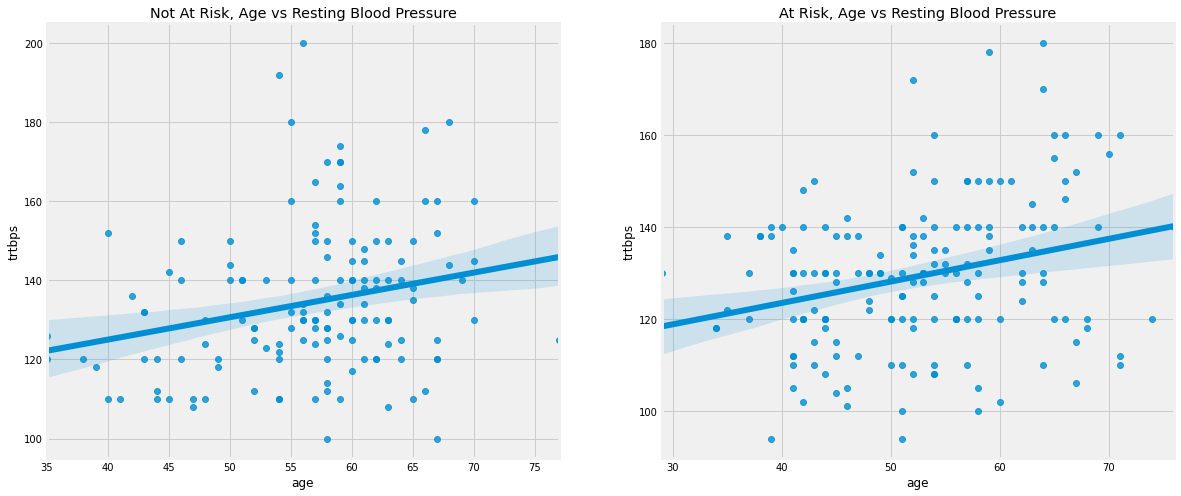

In [26]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.regplot('age','trtbps',data=data[data['output'] == 0],ax=ax[0])
ax[0].set_title('Not At Risk, Age vs Resting Blood Pressure')
sns.regplot('age','trtbps',data=data[data['output'] == 1],ax=ax[1])
ax[1].set_title('At Risk, Age vs Resting Blood Pressure')

Observations:

-As you get older, your resting blood pressure increases

-No solid differences

# Continous Feature: chol (cholestoral)

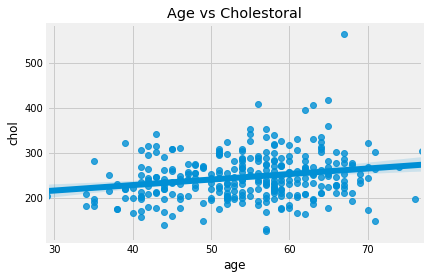

In [27]:
sns.regplot('age','chol',data=data).set_title('Age vs Cholestoral')
plt.show()

Text(0.5, 1.0, 'Cholestoral for Asymptomatic')

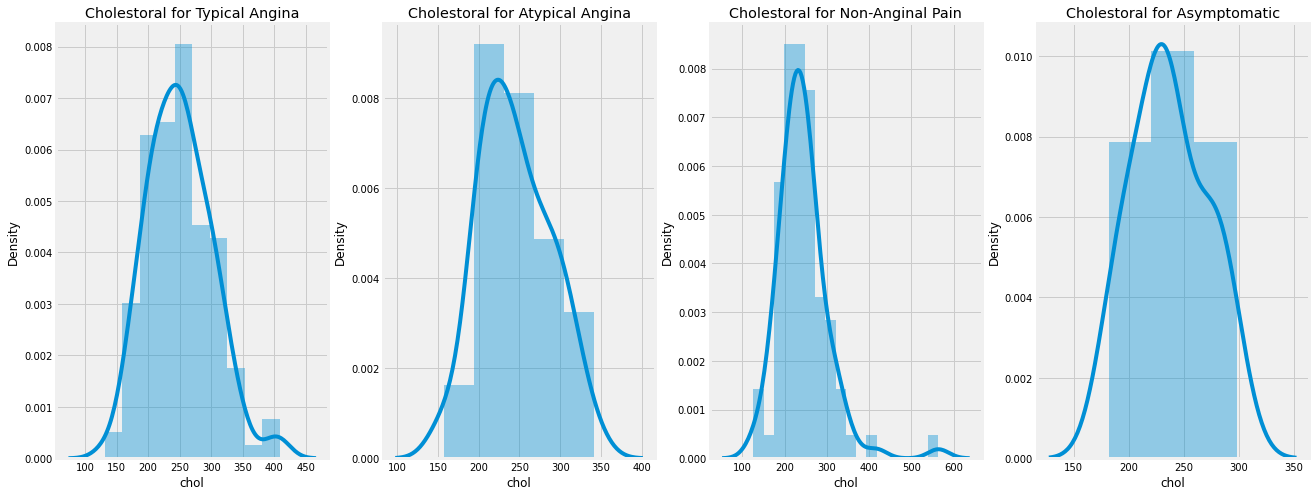

In [28]:
f,ax = plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['cp'] == 0].chol,ax=ax[0])
ax[0].set_title('Cholestoral for Typical Angina')
sns.distplot(data[data['cp'] == 1].chol,ax=ax[1])
ax[1].set_title('Cholestoral for Atypical Angina')
sns.distplot(data[data['cp'] == 2].chol,ax=ax[2])
ax[2].set_title('Cholestoral for Non-Anginal Pain')
sns.distplot(data[data['cp'] == 3].chol,ax=ax[3])
ax[3].set_title('Cholestoral for Asymptomatic')

Observations:

-As age increases, cholestoral increases

-Cholestoral levels over 200 mg/dL usually are considered borderline high and more than 24 is considered high. Most of the people who suffer from some chest pain peak in that range of high cholestoral.

# Continous Feature: thalachh(max heart rate)

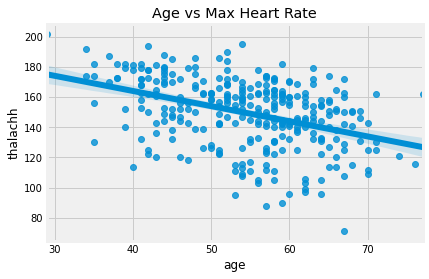

In [29]:
sns.regplot('age','thalachh',data=data).set_title('Age vs Max Heart Rate')
plt.show()

Text(0.5, 1.0, 'Max Heart Rate for Asymptomatic')

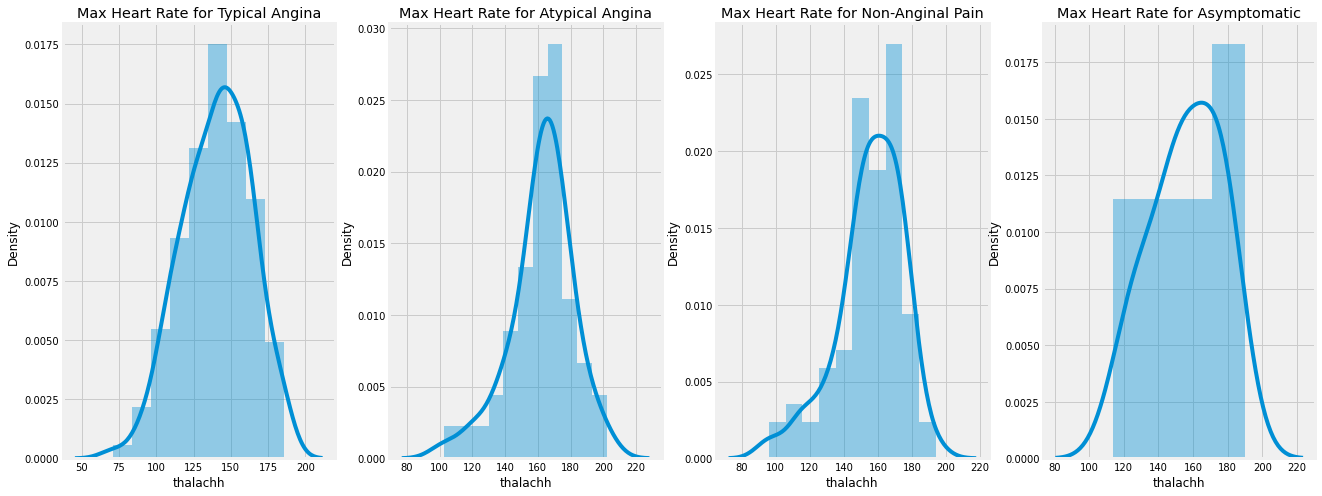

In [30]:
f,ax = plt.subplots(1,4,figsize=(20,8))
sns.distplot(data[data['cp'] == 0].thalachh,ax=ax[0])
ax[0].set_title('Max Heart Rate for Typical Angina')
sns.distplot(data[data['cp'] == 1].thalachh,ax=ax[1])
ax[1].set_title('Max Heart Rate for Atypical Angina')
sns.distplot(data[data['cp'] == 2].thalachh,ax=ax[2])
ax[2].set_title('Max Heart Rate for Non-Anginal Pain')
sns.distplot(data[data['cp'] == 3].thalachh,ax=ax[3])
ax[3].set_title('Max Heart Rate for Asymptomatic')

Observations:

-Max Heart is considerably high when you have increasing chest pain

# Correlation Between Features

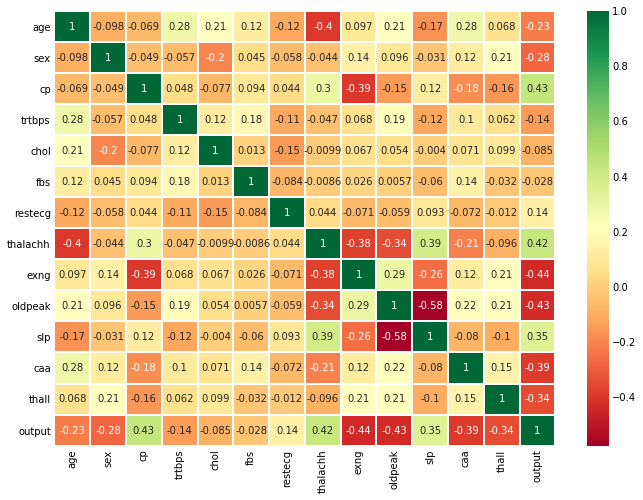

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths = 0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Observations:

-From the features we observed, the highest correlations are around +/- .44.

-Being at risk of heart attack(output) has highest correlations with chest pain and max heart rate(thalachh) at .43/.44

-You can use all features since it's not correlated too much which would indicate multicollinearity(features share similar traits = more unnecessary modeling).

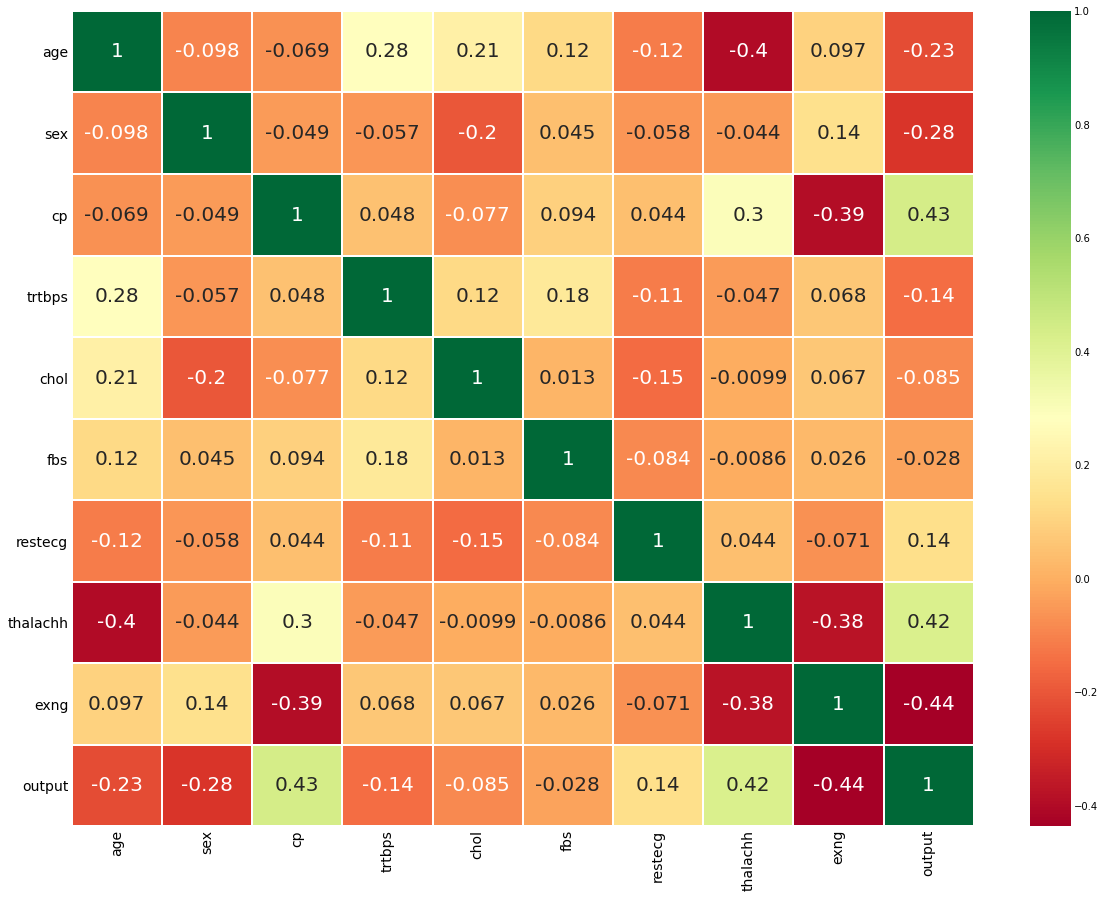

In [32]:
data.drop(['slp','caa','thall','oldpeak'],axis=1,inplace = True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths= 0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Explorative Observations:

What Increases heart attack chances?

-You are 40 years old and up

-You have had some degree of chest pain, risk increasing

-Max heart rate is unusually high.